In [85]:
from torchvision import datasets, transforms
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [87]:
# download and load MNIST training data:
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [88]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


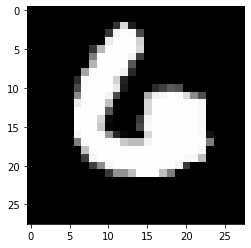

In [22]:
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')

In [24]:
n_in = 784
n_hidden = 256
n_out = 10

W1 = torch.randn((n_in, n_hidden))
W2 = torch.randn((n_hidden, n_out))
b1 = torch.randn((1, n_hidden))
b2 = torch.randn((1, n_out))

def activation(x):
    return 1/(1 + torch.exp(-x))

In [30]:
a1 = activation(torch.mm(images.reshape(64, -1), W1) + b1)
out = torch.mm(a1, W2) + b2

In [33]:
out.shape

torch.Size([64, 10])

In [81]:
def softmax(z):
    ez = torch.exp(z)
    return ez/ez.sum(dim=1).view(-1, 1)

In [82]:
probabilities = softmax(out)
probabilities.sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])

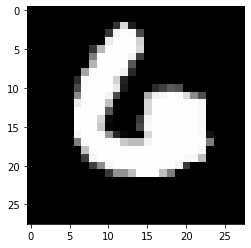

In [83]:
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')

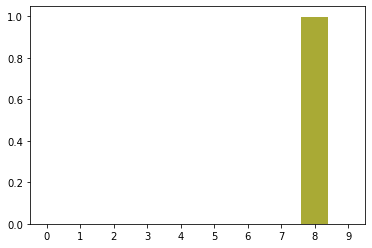

In [84]:
sns.barplot(x=np.arange(10), y=probabilities[0])

In [80]:
probabilities[0]

tensor([2.4349e-10, 1.2495e-03, 1.3130e-06, 1.6608e-10, 3.2515e-10, 4.0883e-08,
        1.8397e-07, 2.5019e-04, 9.9850e-01, 3.9522e-10])